In [50]:
import numpy as np
import h5py
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers import Dropout, Dense
from keras.utils import to_categorical, np_utils

import matplotlib.pyplot as plt
%matplotlib inline

# 2 Redes Convolucionais

Carregando o conjunto de dados

In [2]:
train_dataset = h5py.File('dados/train_catvnoncat.h5' , "r" )
train_set_x_orig = np.array(train_dataset['train_set_x'][:])
train_set_y_orig = np.array(train_dataset['train_set_y'][:])

test_dataset = h5py.File('dados/test_catvnoncat.h5' , "r" )
test_set_x_orig = np.array(test_dataset['test_set_x'][:])
test_set_y_orig = np.array(test_dataset['test_set_y'][:])

classes = np.array(test_dataset['list_classes'][:])
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [3]:
seed =  7
np.random.seed(seed)

#descobrindo as dimensoes da imagem
print(train_set_x_orig.shape)

(209, 64, 64, 3)


In [4]:
CANAIS = 3
LARGURA = 64
ALTURA = 64

### Rede Neura Feed Forward simples com um camada oculta

Preparação dos dados para a rede fnn

In [5]:
num_pixels = LARGURA*ALTURA*CANAIS

train_labels_one_hot = to_categorical(train_set_y_orig)
test_labels_one_hot = to_categorical(test_set_y_orig)

num_classes = classes.shape[0]


X_train = train_set_x_orig
X_test = test_set_x_orig

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalizando a entrada
X_train = X_train / 255
X_test = X_test / 255

#codificando as saidas
Y_train = np_utils.to_categorical(train_set_y_orig)
Y_test = np_utils.to_categorical(test_set_y_orig)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((209, 12288), (50, 12288), (209, 2), (50, 2))

### Criando a Rede

In [45]:
fnn = Sequential()
fnn.add(Dense(num_classes, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
fnn.add(Dense(num_classes, activation="softmax", kernel_initializer="normal"))
fnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = fnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=20, verbose=1)

Train on 209 samples, validate on 50 samples
Epoch 1/5
209/209 [==============================] - 0s - loss: 0.6701 - acc: 0.6507 - val_loss: 0.9033 - val_acc: 0.3400
Epoch 2/5
209/209 [==============================] - 0s - loss: 0.6365 - acc: 0.6555 - val_loss: 0.8155 - val_acc: 0.3400
Epoch 3/5
209/209 [==============================] - 0s - loss: 0.6303 - acc: 0.6555 - val_loss: 0.8929 - val_acc: 0.3400
Epoch 4/5
209/209 [==============================] - 0s - loss: 0.6229 - acc: 0.6555 - val_loss: 0.7650 - val_acc: 0.3400
Epoch 5/5
209/209 [==============================] - 0s - loss: 0.6040 - acc: 0.6555 - val_loss: 0.8913 - val_acc: 0.3400


Avaliando o modelo

Baseline Error: 66.00%


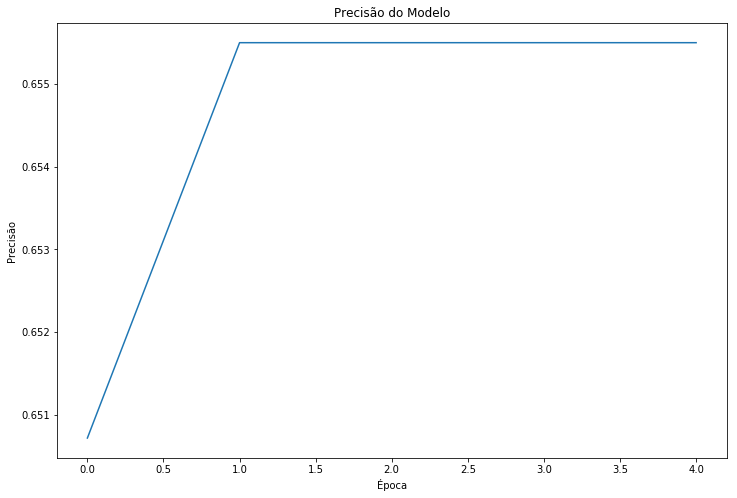

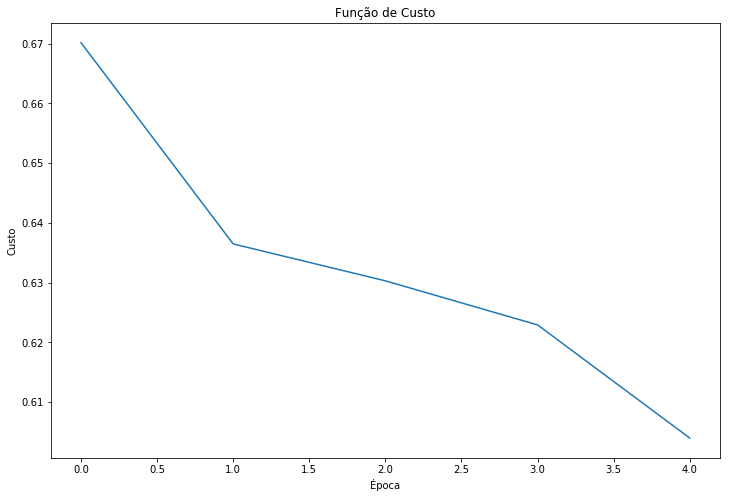

In [47]:
scores = fnn.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

plt.figure(figsize=(12,8))

plt.plot(history.history['acc'])
plt.title('Precisão do Modelo')
plt.ylabel('Precisão')
plt.xlabel('Época')

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.title('Função de Custo')
plt.ylabel('Custo')
plt.xlabel('Época')


# Rede Convolucional

In [95]:
cnn = Sequential()
cnn.add(Convolution2D(batch_input_shape=(None, LARGURA, ALTURA, CANAIS), filters=32, kernel_size=5, strides=1, padding='same', data_format='channels_first',))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [96]:
X_train = train_set_x_orig
X_test = test_set_x_orig

X_train = X_train.reshape(X_train.shape[0], LARGURA, ALTURA, CANAIS).astype('float32')
X_test = X_test.reshape(X_test.shape[0], LARGURA, ALTURA, CANAIS).astype('float32')

# Normalizando a entrada
X_train = X_train / 255
X_test = X_test / 255

#codificando as saidas
Y_train = np_utils.to_categorical(train_set_y_orig)
Y_test = np_utils.to_categorical(test_set_y_orig)

In [99]:
history = cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=50, verbose=1)

Train on 209 samples, validate on 50 samples
Epoch 1/10
209/209 [==============================] - 0s - loss: 0.5461 - acc: 0.7273 - val_loss: 0.5253 - val_acc: 0.7000
Epoch 2/10
209/209 [==============================] - 0s - loss: 0.5972 - acc: 0.6699 - val_loss: 0.9083 - val_acc: 0.3400
Epoch 3/10
209/209 [==============================] - 0s - loss: 0.5171 - acc: 0.7416 - val_loss: 0.7136 - val_acc: 0.5600
Epoch 4/10
209/209 [==============================] - 0s - loss: 0.4971 - acc: 0.7847 - val_loss: 0.5619 - val_acc: 0.7600
Epoch 5/10
209/209 [==============================] - 0s - loss: 0.5204 - acc: 0.7751 - val_loss: 0.5448 - val_acc: 0.8400
Epoch 6/10
209/209 [==============================] - 0s - loss: 0.5146 - acc: 0.7273 - val_loss: 0.6472 - val_acc: 0.6200
Epoch 7/10
209/209 [==============================] - 0s - loss: 0.4904 - acc: 0.7943 - val_loss: 0.4975 - val_acc: 0.7400
Epoch 8/10
209/209 [==============================] - 0s - loss: 0.5163 - acc: 0.7225 - val_lo

Avaliando o modelo

Baseline Error: 40.00%


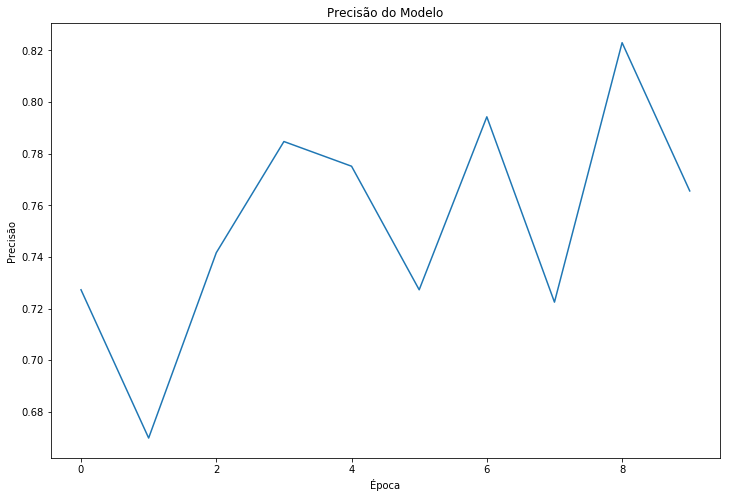

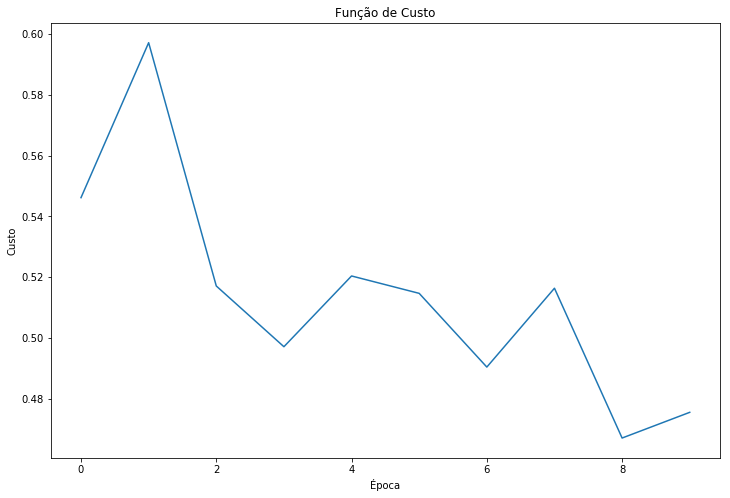

In [100]:
scores = cnn.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

plt.figure(figsize=(12,8))

plt.plot(history.history['acc'])
plt.title('Precisão do Modelo')
plt.ylabel('Precisão')
plt.xlabel('Época')

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.title('Função de Custo')
plt.ylabel('Custo')
plt.xlabel('Época')

As redes convolucionais se mostraram muitos mais acertivas para o exemplo. 
A rede Feed Forward simples encontrar seus parâmetros já na primeira época e não aprende mais nada de novo nas épocas
subsequentes, equanto a rede convolucional continua aprendendo, de maneira mais errática, mas 
consegue um reultado bem melhor no final